<a href="https://colab.research.google.com/github/AmyB-UMFlint/HW3/blob/main/BrownMorganHarmsHW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please see examples we did in class. Questions are just variations of what we did earlier.

# **HW3 for Amy Brown, Angela Morgan & Tayler Harms**

**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')
print(df.head())


   Year              Datetime    Stage         Stadium         City  \
0  1930  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France                4                1         Mexico   
1            USA                3                0        Belgium   
2     Yugoslavia                2                1         Brazil   
3        Romania                3                1           Peru   
4      Argentina                1                0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                     3                     0   
1     

**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year.

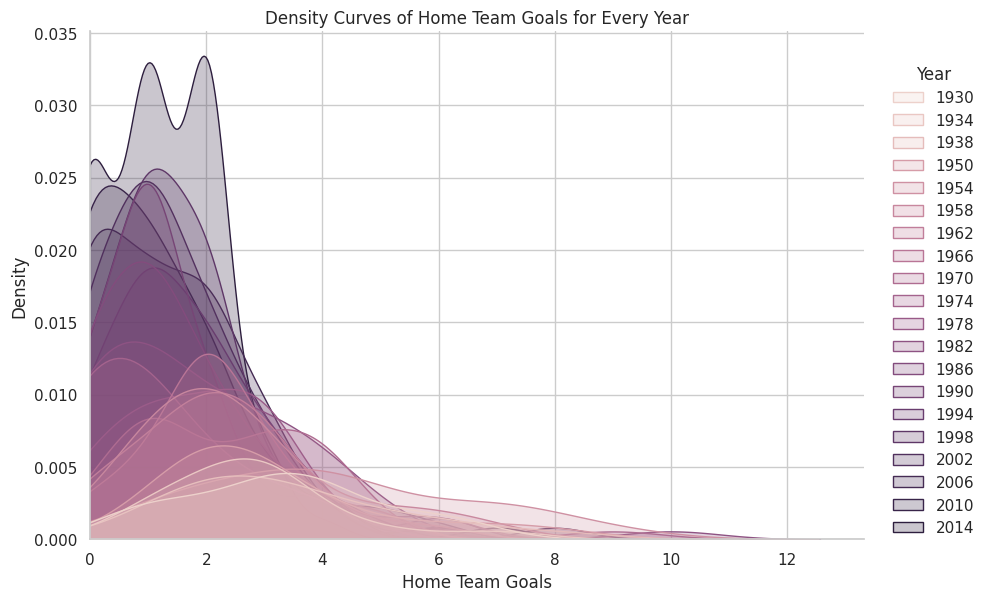

In [4]:
sns.set(style="whitegrid")

sns.displot(data=df, x="Home Team Goals", hue="Year", kind="kde", fill=True, height=6, aspect=1.5)
plt.xlim(0)

plt.title('Density Curves of Home Team Goals for Every Year')
plt.xlabel('Home Team Goals')
plt.ylabel('Density')

plt.show()

**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really cluttered. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

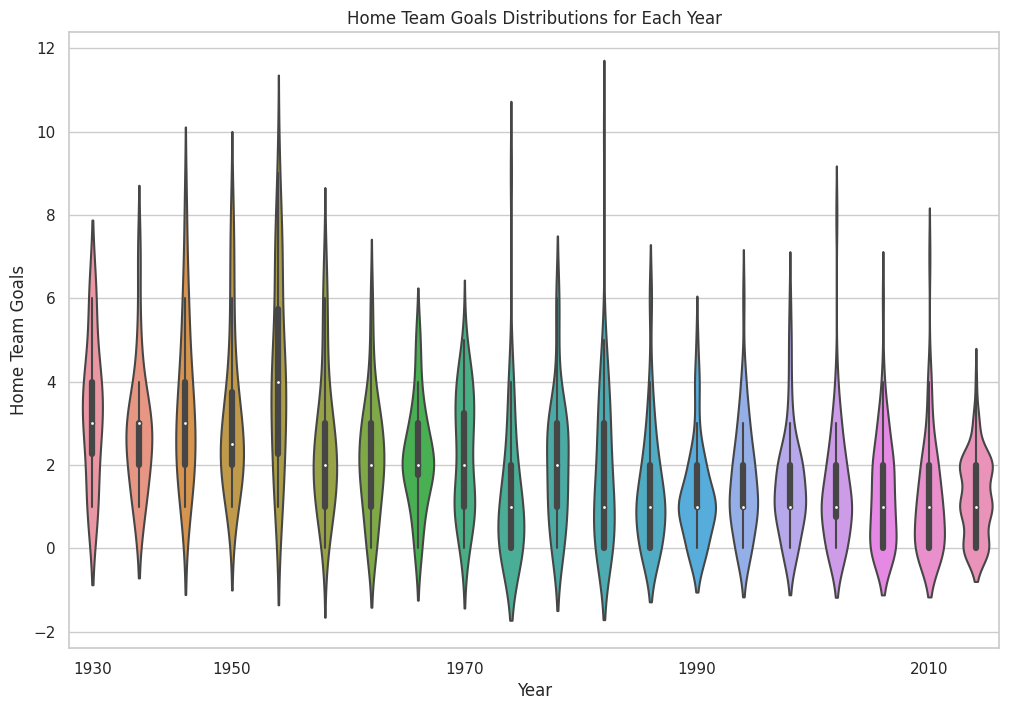

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

ax = sns.violinplot(x="Year", y="Home Team Goals", data=df)

labels=[y if y%10==0 else None for y in list(df.Year.unique())]

ax.set_xticklabels(labels)

plt.title('Home Team Goals Distributions for Each Year')
plt.xlabel('Year')
plt.ylabel('Home Team Goals')

plt.show()

**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [7]:
!pip install joypy

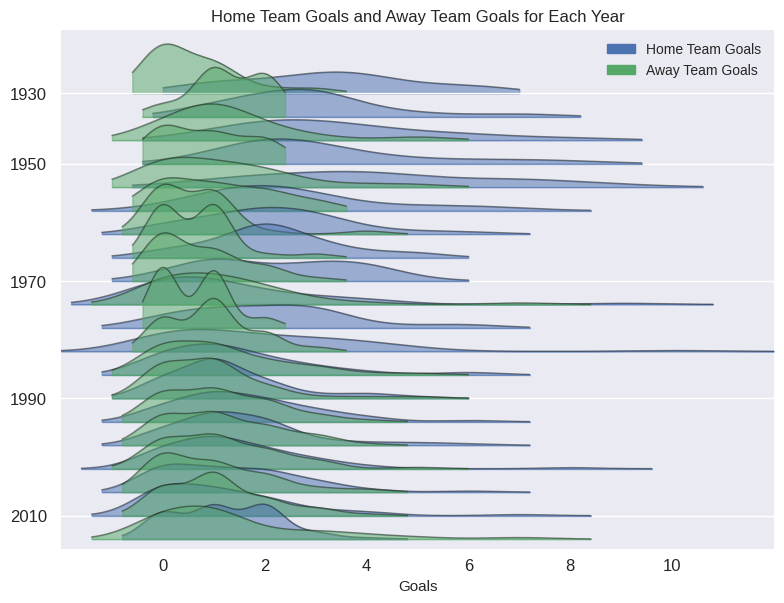

In [12]:
import joypy as jp
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = jp.joyplot(df, by='Year', column=['Home Team Goals', 'Away Team Goals'], alpha=0.5, labels=labels, range_style='own',
                          grid="y", linewidth=1, legend=True, figsize=(8,6),
                          title='Home Team Goals and Away Team Goals for Each Year')
#alpha sets the transparency

plt.xlabel('Goals')
plt.ylabel('Year')

plt.show()

Once you visualize, please add plt.style.use('seaborn-white') to see how colors change in your second run.

<ipython-input-9-37e193d11140>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


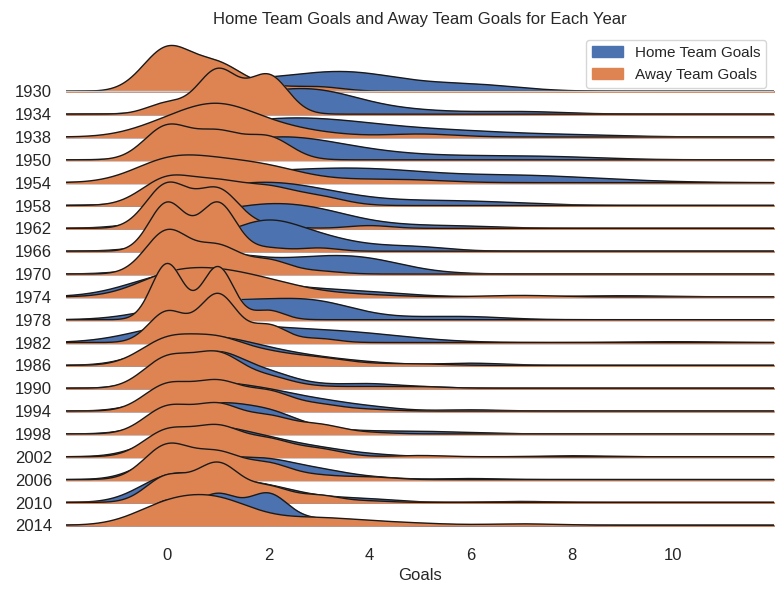

In [9]:
import joypy as jp
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = jp.joyplot(df, by='Year', column=['Home Team Goals', 'Away Team Goals'],
                          grid="y", linewidth=1, legend=True, figsize=(8,6),
                          title='Home Team Goals and Away Team Goals for Each Year')

plt.style.use('seaborn-white')

plt.xlabel('Goals')
plt.ylabel('Year')

plt.show()

It gave me an error message so I searched for the new style names

In [10]:
import matplotlib.pyplot as plt

# Display the available style names
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


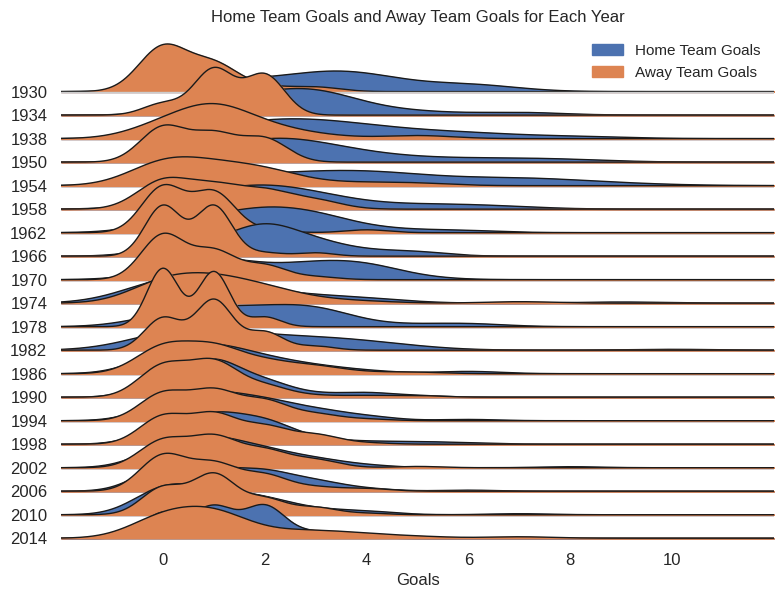

In [11]:
import joypy as jp
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = jp.joyplot(df, by='Year', column=['Home Team Goals', 'Away Team Goals'],
                          grid="y", linewidth=1, legend=True, figsize=(8,6),
                          title='Home Team Goals and Away Team Goals for Each Year')

plt.style.use('seaborn-v0_8')

plt.xlabel('Goals')
plt.ylabel('Year')

plt.show()

**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line.

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals.



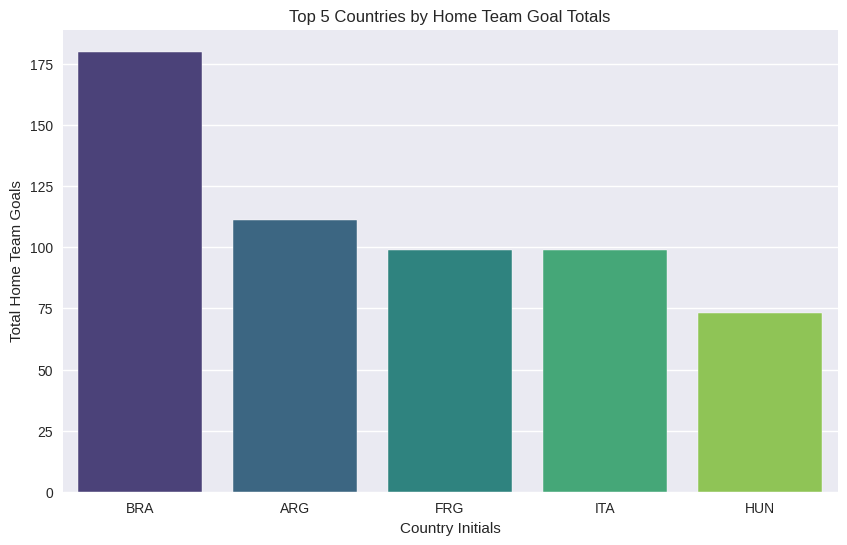

In [13]:
# Group by Home Team Initials and sum
home_team_goals_sum = df.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()

# Sort
home_team_goals_sum_sorted = home_team_goals_sum.sort_values(by='Home Team Goals', ascending=False)

# Visualize top 5 in a bar plot
top_countries = home_team_goals_sum_sorted.head(5)

plt.figure(figsize=(10, 6))

# Seaborn barplot
sns.barplot(x='Home Team Initials', y='Home Team Goals', data=top_countries,palette='viridis')

plt.xlabel('Country Initials')
plt.ylabel('Total Home Team Goals')
plt.title('Top 5 Countries by Home Team Goal Totals')

plt.show()

**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



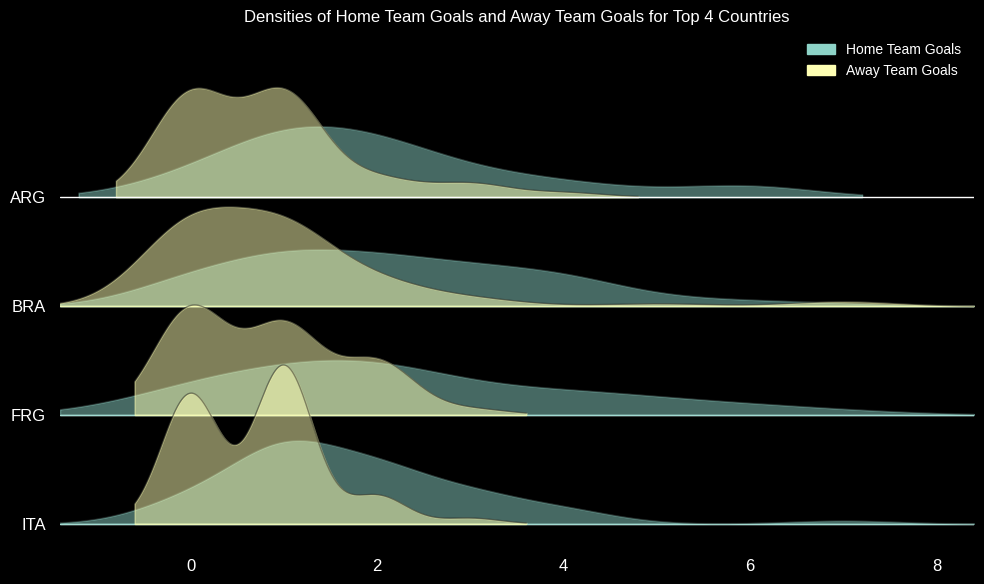

In [15]:
# Extract Rows
top_4_countries = home_team_goals_sum_sorted.head(4)
top_4_countries_initials = top_4_countries['Home Team Initials']

# Filter Rows
top_4_data = df[df['Home Team Initials'].isin(top_4_countries_initials)]

# Joyplot Visual
labels = ['Home Team Goals', 'Away Team Goals']
# dark background
plt.style.use('dark_background')

fig, axes = jp.joyplot(top_4_data, by ='Home Team Initials', column=labels, alpha=0.5, range_style='own',
                       grid='y', linewidth=1, legend=True, figsize=(10, 6),
                       title='Densities of Home Team Goals and Away Team Goals for Top 4 Countries')

plt.show()

**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [16]:
!pip install seaborn_qqplot

In [17]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
plt.style.use('ggplot') #this is to change the color theme.

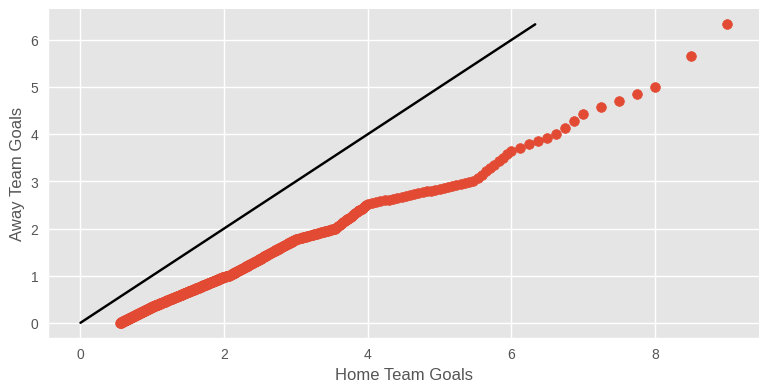

In [26]:
from seaborn_qqplot import pplot
from scipy.stats import norm
pplot(df, x='Home Team Goals', y='Away Team Goals', kind = 'qq', display_kws={"identity":True}, height=4, aspect=2)


## Because the actual data falls below the line, it suggests  that on average the Away Team tends to score fewer goals than predicted by the distribution of the home team goals.

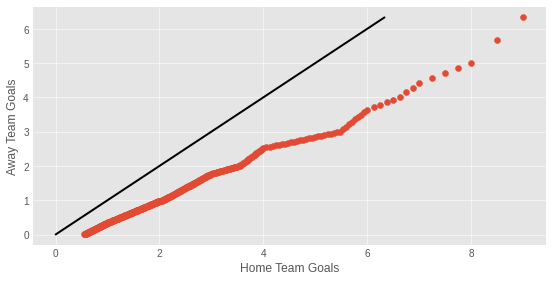

In [ ]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
plt.style.use('ggplot') #this is to change the color theme.
#below is example from homework to try and match